In [161]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

### *Data Description*

In [2]:
taiwan = pd.read_excel("default of credit card clients.xls", header = 1, index_col = 0)

In [3]:
taiwan.shape

(30000, 24)

In [4]:
taiwan.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
taiwan.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
taiwan.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
taiwan.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### *Data Analysis*

#### **default payment next month**

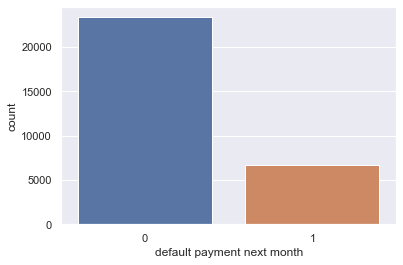

In [72]:
sns.countplot(data = taiwan, x = "default payment next month");

#### **LIMIT_BAL** *(Amount of given credit (NT Dollars))*

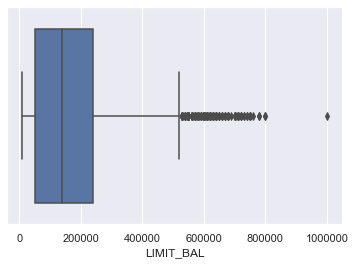

In [8]:
sns.boxplot(data = taiwan, x = "LIMIT_BAL", orient = "h");

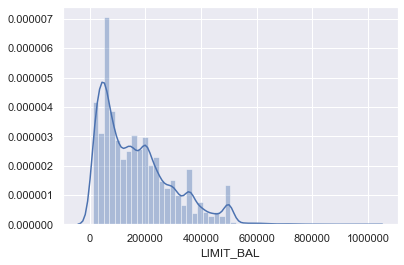

In [9]:
sns.distplot(a = taiwan["LIMIT_BAL"]);

#### **SEX** *(1 = Male, 2 = Female)*

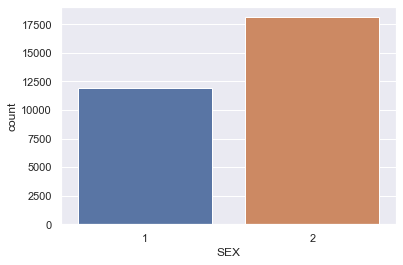

In [10]:
sns.countplot(data = taiwan, x = "SEX");

#### **EDUCATION** *(0 = ?, 1 = Graduate school, 2 = University, 3 = High School, 4 = Others, 5 = ?, 6 = ?)*

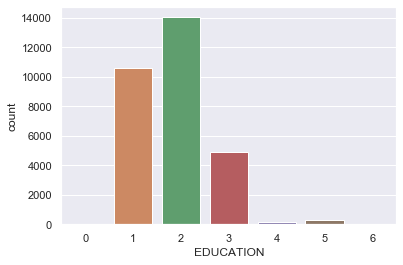

In [11]:
sns.countplot(data = taiwan, x = "EDUCATION");

In [12]:
taiwan[["EDUCATION"]].where((taiwan["EDUCATION"] > 4) | (taiwan["EDUCATION"] == 0)).dropna(how = "all").shape

(345, 1)

#### **MARRIAGE** *(0 = ?, 1 = Married, 2 = Single, 3 = Others)*

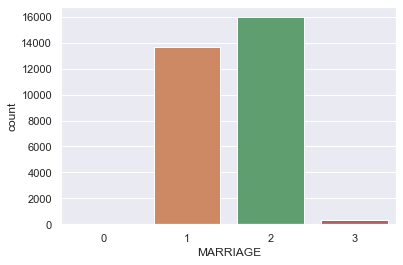

In [13]:
sns.countplot(data = taiwan, x = "MARRIAGE");

In [14]:
taiwan[["MARRIAGE"]].where(taiwan["MARRIAGE"] == 0).dropna(how = "all").shape

(54, 1)

#### **AGE** *(Years)*

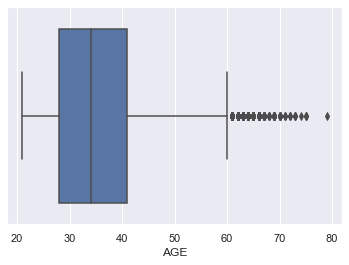

In [15]:
sns.boxplot(data = taiwan, x = "AGE");

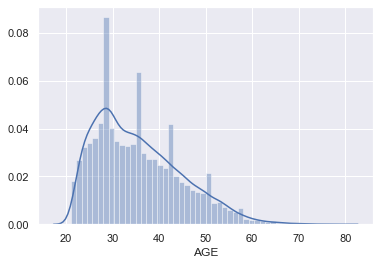

In [16]:
sns.distplot(a = taiwan["AGE"]);

#### **PAY_0..6** *(PAY_6 : April ---> PAY_0 : September)*
- *-2 = Payment in advance (2 month)*
- *-1 = Payment in advance (1 month)*
- *0 = Pay duly*
- *1 = Pay delay for 1 month*
- *2 = Pay delay for 2 month ...*
- *9 = Pay delay for 9 month and above)*


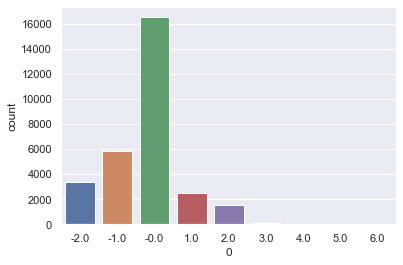

In [17]:
pay_mean = pd.DataFrame(round(taiwan[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].mean(axis = 1)))
sns.countplot(data = pay_mean, x = 0);

#### **BILL_AMT1..6** *(BILL_AMT6 : April ---> BILL_AMT1 : September) (Amount of bill statement (NT Dollars))*

In [18]:
taiwan.where(taiwan["BILL_AMT1"] == 0).dropna(how = "all").shape

(2008, 24)

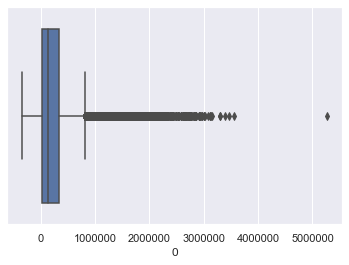

In [19]:
bill_mean = pd.DataFrame(round(taiwan[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis = 1), 2))
sns.boxplot(data = bill_mean, x = 0);

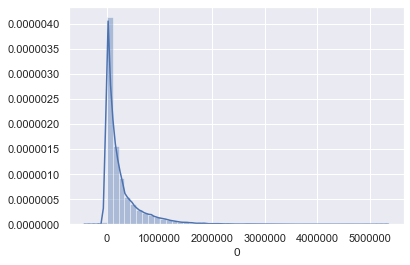

In [20]:
sns.distplot(a = bill_mean[0]);

#### **PAY_AMT1..6** *(PAY_AMT6 : April ---> PAY_AMT1 : September) (Amount of previous payment (NT Dollars))*

In [21]:
taiwan.where(taiwan["PAY_AMT1"] == 0).dropna(how = "all").shape

(5249, 24)

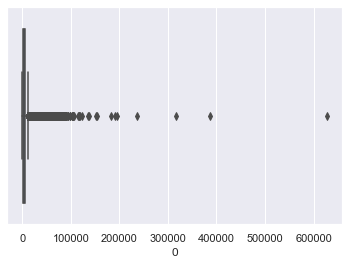

In [22]:
pay_sum = pd.DataFrame(round(taiwan[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis = 1)))
sns.boxplot(data = pay_sum, x = 0);

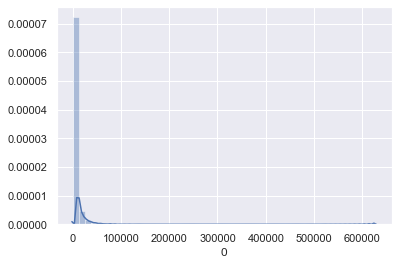

In [23]:
sns.distplot(a = pay_sum[0]);

#### *Correlation Matrix*

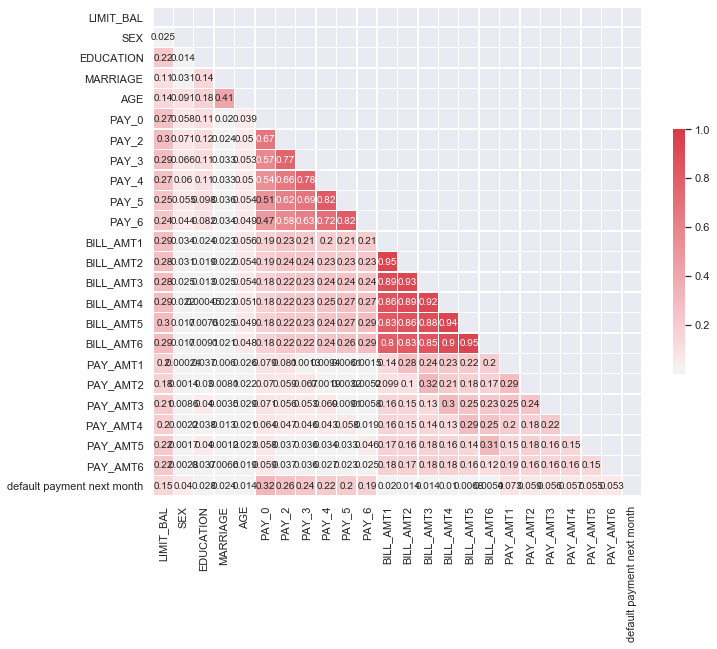

In [24]:
correlation = abs(taiwan.corr())

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True);

### *Feature Engineering*

#### *Cleaning DataFrame*

In [119]:
clean_taiwan = pd.DataFrame()

In [120]:
clean_taiwan = taiwan.replace({'EDUCATION': [0, 5, 6], 'MARRIAGE': 0}, np.NaN)
clean_taiwan.dropna(axis = 'index', inplace = True)

#### *Replacing PAY0..6 with median*

In [121]:
pay_med = []
for i in range(1, clean_taiwan.shape[0] + 1):
    pay_med.append(taiwan.loc[[i], ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].median(axis = 1).values[0])

In [122]:
clean_taiwan.insert(loc = 5, column = "PAY_MED", value = pay_med)
clean_taiwan.drop(columns = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"], inplace = True)

#### *Replacing BILL_AMT1..6 with sum*

In [123]:
bill_sum = []
for i in range(1, clean_taiwan.shape[0] + 1):
    bill_sum.append(taiwan.loc[[i], ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis = 1).values[0])

In [124]:
clean_taiwan.insert(loc = 6, column = "BILL_SUM", value = bill_sum)
clean_taiwan.drop(columns = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], inplace = True)

#### *Replacing PAY_AMT1..6 with sum*

In [125]:
pay_amt_sum = []
for i in range(1, clean_taiwan.shape[0] + 1):
    pay_amt_sum.append(taiwan.loc[[i], ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].sum(axis = 1).values[0])

In [126]:
clean_taiwan.insert(loc = 7, column = "PAY_AMT_SUM", value = pay_amt_sum)
clean_taiwan.drop(columns = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"], inplace = True)

#### *Correlation Matrix*

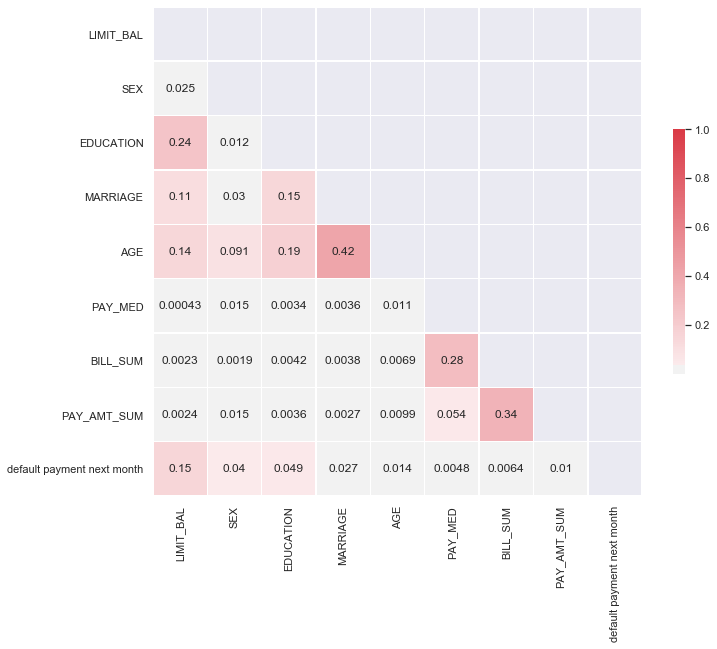

In [85]:
correlation = abs(clean_taiwan.corr())

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True);

#### *Scaling*

In [127]:
scaler = StandardScaler()
for i in ["LIMIT_BAL", "AGE", "PAY_MED", "BILL_SUM", "PAY_AMT_SUM"]:
    clean_taiwan[i] = scaler.fit_transform(clean_taiwan[i].values.reshape(-1, 1))

#### *Encoding*

In [150]:
data = clean_taiwan.copy()

data = data.replace({'EDUCATION': 1}, "Graduate School")
data = data.replace({'EDUCATION': 2}, "University")
data = data.replace({'EDUCATION': 3}, "High School")
data = data.replace({'EDUCATION': 4}, "Others")

data = data.replace({'MARRIAGE': 1}, "Married")
data = data.replace({'MARRIAGE': 2}, "Single")
data = data.replace({'MARRIAGE': 3}, "Others")

data = pd.get_dummies(data)

cols = data.columns.to_list()
cols.remove("default payment next month")
target = clean_taiwan.iloc[:, -1]
data = data[cols]
data["default payment next month"] = target.values

clean_taiwan = data.copy()

In [158]:
clean_taiwan.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_MED', 'BILL_SUM', 'PAY_AMT_SUM',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Married',
       'MARRIAGE_Others', 'MARRIAGE_Single', 'default payment next month'],
      dtype='object')

#### *Applying PCA*

In [159]:
pca = PCA(n_components = 4)

col = ["LIMIT_BAL", "SEX", "AGE", "PAY_MED", "BILL_SUM", "PAY_AMT_SUM"]

principal_components = pca.fit_transform(clean_taiwan[col])
principalDf = pd.DataFrame(data = principal_components, columns = ['Composante Principale 1', 'Composante Principale 2', 
                                                                   'Composante Principale 3', 'Composante Principale 4'])

finalDf = principalDf
finalDf["default payment next month"] = clean_taiwan["default payment next month"].values

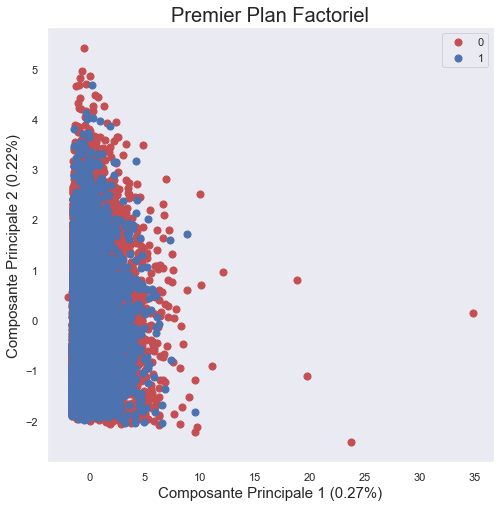

In [160]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Composante Principale 1 (' + str(round(pca.explained_variance_ratio_[0], 2)) + '%)', fontsize = 15)
ax.set_ylabel('Composante Principale 2 (' + str(round(pca.explained_variance_ratio_[1], 2)) + '%)', fontsize = 15)
ax.set_title('Premier Plan Factoriel', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['default payment next month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Composante Principale 1']
               , finalDf.loc[indicesToKeep, 'Composante Principale 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [167]:
fa = FactorAnalysis(n_components = 4)

col = ["LIMIT_BAL", "SEX", "AGE", "PAY_MED", "BILL_SUM", "PAY_AMT_SUM"]

principal_components = fa.fit_transform(clean_taiwan[col])

principalDf = pd.DataFrame(data = principal_components, columns = ['Composante Principale 1', 'Composante Principale 2', 
                                                                   'Composante Principale 3', 'Composante Principale 4'])

finalDf = principalDf
finalDf["default payment next month"] = clean_taiwan["default payment next month"].values

AttributeError: 'FactorAnalysis' object has no attribute 'explained_variance_ratio_'

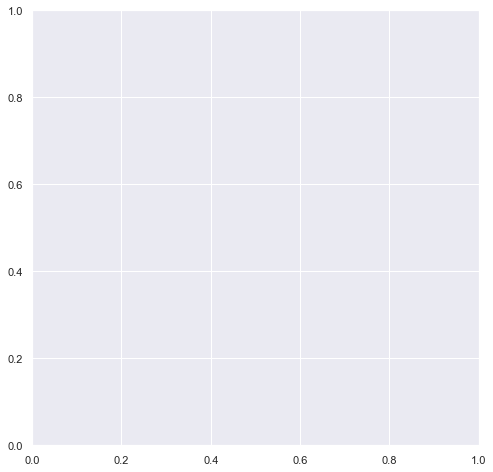

In [169]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Composante Principale 1 (' + str(round(fa.explained_variance_ratio_[0], 2)) + '%)', fontsize = 15)
ax.set_ylabel('Composante Principale 2 (' + str(round(fa.explained_variance_ratio_[1], 2)) + '%)', fontsize = 15)
ax.set_title('Premier Plan Factoriel', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['default payment next month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Composante Principale 1']
               , finalDf.loc[indicesToKeep, 'Composante Principale 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### *Machine Learning models*

In [ ]:
X = clean_taiwan.iloc[:, :-1].values
y = clean_taiwan.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

error = []

for i in range(1, 1000):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    yi_pred = classifier.predict(X_test)
    error.append(np.mean(yi_pred != y_test))
plt.figure(figsize = (20, 6))
sns.set(style="darkgrid")
plt.xticks(range(1, 1000, 1))
plt.xlabel("k Value")
plt.ylabel("Mean Error")
plt.plot(range(1, 1000), error, marker = 'o');